## Lack of dependency on number of years is suspicious
Test Grid Search CV variables

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from dbhelper import pd_query
from BorderModel import BorderData, clean_df_subset

In [3]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth,
            week,
            dayofweek,
            minofday
        from crossingdata c
        join datefeatures d on c.date = d.date
        where
            valid=1
            and waittime is not null
            and crossing_id = 1
            and (minute = 0 or minute = 30)
        order by c.date
        '''

df = pd_query(query)

## RF with prepared CV

OOB:  0.510172663846
** MSE for last cv fold **
Baseline :  107.994317561
Model    :  108.033833987
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  0.14574102682
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.282511012767


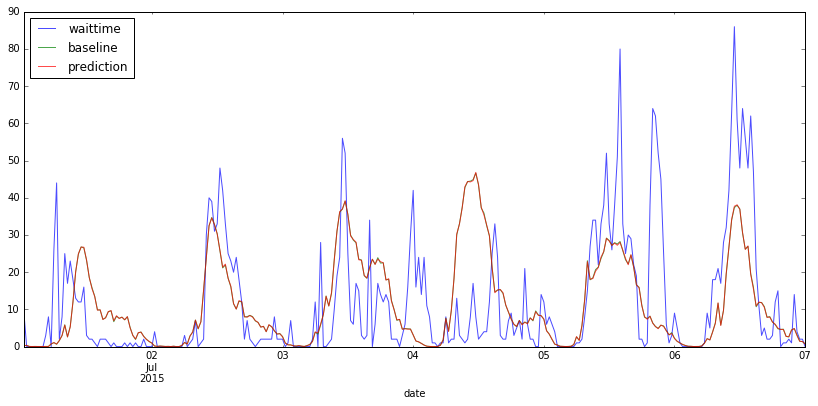

In [8]:
dfnew = clean_df_subset(df, ['year', 'dayofweek', 'minofday'])
data = BorderData(dfnew)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('7/1/15', '7/7/15');

## RF with no CV

OOB:  0.510034042012
** MSE for last cv fold **
Baseline :  107.994317561
Model    :  108.132468063
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  0.144961094823
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.28209676963


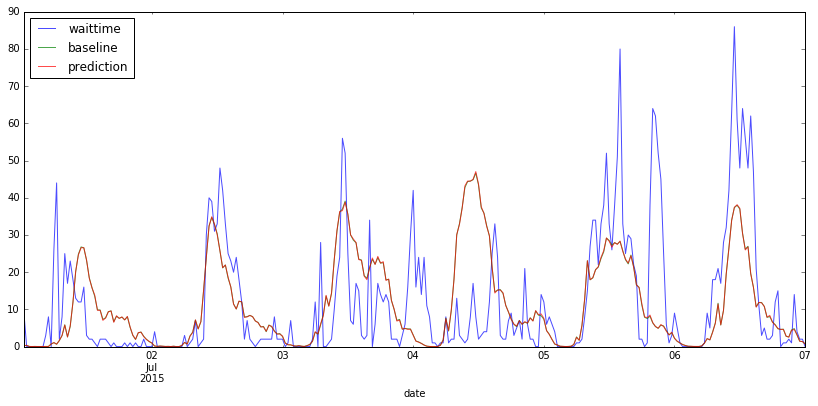

In [10]:
dfnew = clean_df_subset(df, ['year', 'dayofweek', 'minofday'])
data = BorderData(dfnew)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
model.fit(data.X_train, data.y_train)
data.predict(model)
data.print_metrics(model)
data.plot('7/1/15', '7/7/15');

## RF with built-in 3-fold CV

OOB:  0.510065817493
** MSE for last cv fold **
Baseline :  107.994317561
Model    :  107.855677369
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  0.147149769654
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.283669809573


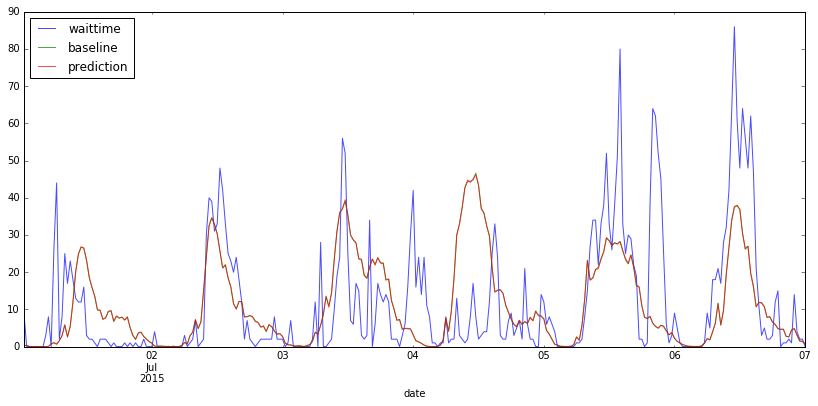

In [9]:
dfnew = clean_df_subset(df, ['year', 'dayofweek', 'minofday'])
data = BorderData(dfnew)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=3)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('7/1/15', '7/7/15');

## Exclude 2014 data to see if effect is same

OOB:  0.504101861376
** MSE for last cv fold **
Baseline :  99.8672948257
Model    :  99.7898531907
** R^2 for last cv fold **
Baseline :  0.536521408378
Model    :  0.536880810723
** Explained variance for last cv fold **
Baseline :  0.540455997203
Model    :  0.540696473951


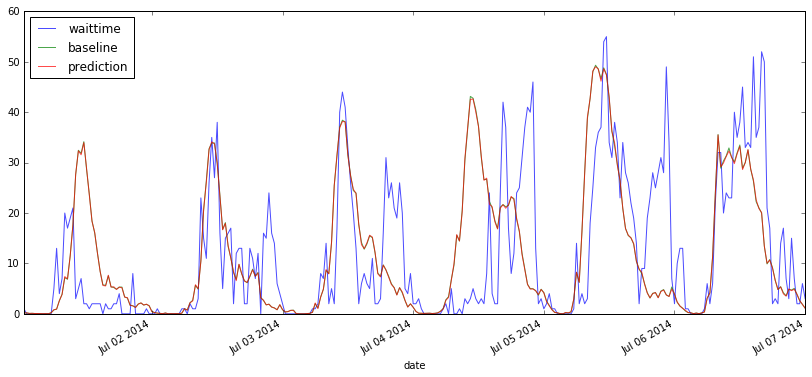

In [15]:
dfnew = clean_df_subset(df, ['year', 'dayofweek', 'minofday'])
dfnew = dfnew[dfnew.date < '2015']
data = BorderData(dfnew)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('7/1/14', '7/7/14');

## Closeness of prediction of baseline and invariance of prediction is suspicious of data leakage 

## Removing years results in a model that appears to use data across years

OOB:  0.463131856559
** MSE for last cv fold **
Baseline :  107.994317561
Model    :  178.109592814
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.408370991338
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  -0.00266909562782


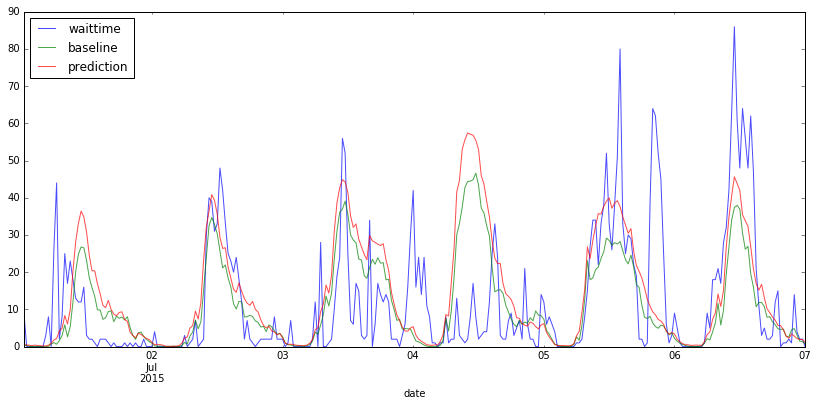

In [19]:
dfnew = clean_df_subset(df, ['dayofweek', 'minofday'])
data = BorderData(dfnew)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('7/1/15', '7/7/15');

## RF with no date features removed

OOB:  0.84405240024
** MSE for last cv fold **
Baseline :  107.994317561
Model    :  128.87708452
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.019073394191
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.139069226763


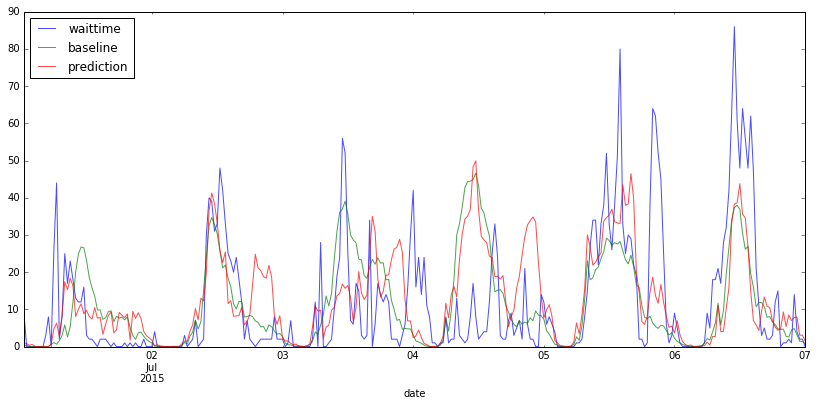

In [26]:
data = BorderData(df)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('7/1/15', '7/7/15');

## RF is on hold.  Moving to an ARIMA model instead.  

Overall conclusion is that there is no leakage, but RF is selecting most recent year because it is indeed most predictive.